In [95]:
import live2p
from live2p.analysis import process_data, clean_data, min_subtract, baseline_subtract
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import json
import scipy.stats as stats
import sklearn

In [2]:
%load_ext autoreload
%autoreload 2

In [126]:
base = 'D:/Frankenrig/Experiments'
mouse = 'w32_2'
date = '20210420'
epoch = '1'

path = Path(base, mouse, date, epoch)

In [127]:
jfile = list(path.glob('*json'))[0]
with open(jfile, 'r') as f:
    jfile = json.load(f)

In [128]:
jfile.keys()

dict_keys(['c', 'splits'])

In [129]:
data = process_data(**jfile, normalizer='zscore', fr=6.36, )

In [130]:
data.shape

(29, 442, 24)

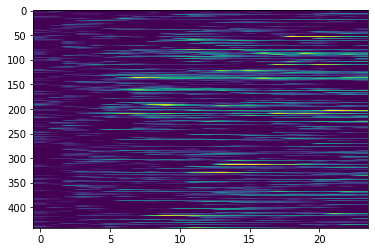

In [131]:
plt.imshow(data[2,:,:], aspect='auto', vmin=0, vmax=2)

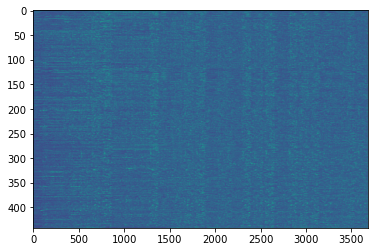

In [132]:
traces = np.asarray(jfile['c'])
traces_min = min_subtract(traces)
traces_norm = stats.zscore(traces_min, axis=1)

plt.imshow(traces_norm, aspect='auto')

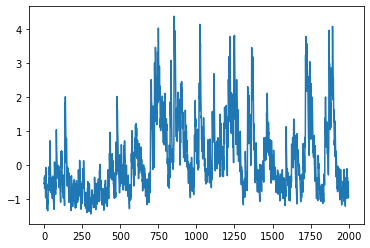

In [133]:
plt.plot(traces_norm[1,:2000])

In [141]:
import pandas as pd
def rolling_baseline_dff(traces):
    f0s = pd.DataFrame(traces.T).rolling(200, min_periods=1, center=True).quantile(0.2)
    f0s = f0s.values.T
    traces = (traces-f0s)/f0s
    return traces

Text(0.5, 1.0, 'rolling zscore')

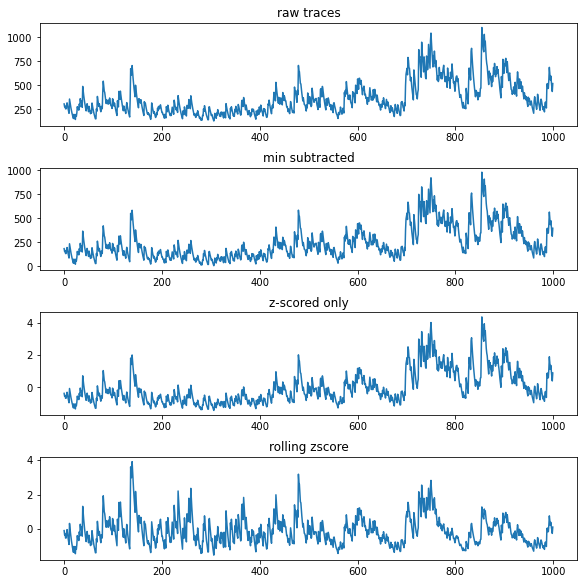

In [146]:
fig, axes = plt.subplots(4,1, constrained_layout=True, figsize=(8,8))

cell = 1
win = slice(0,1000)

ax = axes[0]
ax.plot(traces[cell,win])
ax.set_title('raw traces')

ax = axes[1]
ax.plot(traces_min[cell,win])
ax.set_title('min subtracted')

ax = axes[2]
ax.plot(traces_norm[cell,win])
ax.set_title('z-scored only')

ax = axes[3]
traces_rolling = rolling_baseline_dff(traces_min)
traces_norm_zd = stats.zscore(traces_rolling, axis=1)
ax.plot(traces_norm_zd[cell,win])
ax.set_title('rolling zscore')